In [157]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [158]:
# Download the file using curl
!curl -o AirlineTweets.csv https://lazyprogrammer.me/course_files/AirlineTweets.csv

# Read the CSV file using the correct file name 'spam.csv'
df_ = pd.read_csv('AirlineTweets.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3341k  100 3341k    0     0  5751k      0 --:--:-- --:--:-- --:--:-- 5780k


In [159]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [160]:
df = df_[['airline_sentiment', 'text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

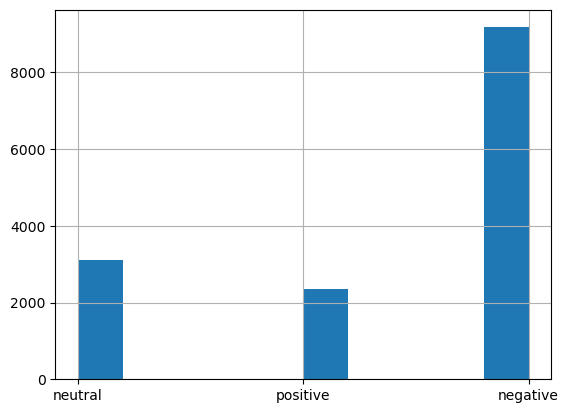

In [161]:
df['airline_sentiment'].hist()

In [162]:
df['target'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

In [163]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [164]:
df_train, df_test = train_test_split(df)

In [165]:
df_test.shape

(3660, 3)

In [166]:
vectorizer = CountVectorizer(max_features=2000)

In [167]:
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

In [168]:
Y_train = df_train['target']
Y_test = df_test['target']

In [169]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8932604735883425
Test acc: 0.7975409836065573


C:\Program Files\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9675963124519669
Test AUC: 0.8902177885942049


In [171]:
# model.predict_proba(X_train)

In [172]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [173]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.95411645, 0.00827646, 0.03760709],
       [0.09558824, 0.82522624, 0.07918552],
       [0.18150538, 0.05376344, 0.76473118]])

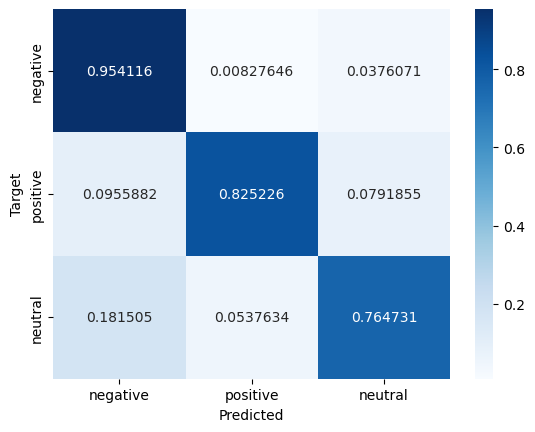

In [174]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g',cmap='Blues')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

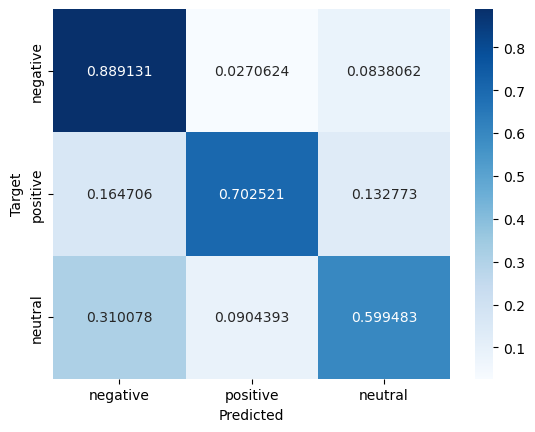

In [175]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

# Binary Labels & Model Interpretation

In [176]:
# target_map={'positive': 1, 'negative': 0, 'neutral': 2}
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [177]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [178]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [179]:
# X_train.shape

In [180]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [181]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9622183708838822
Test acc: 0.9248094248094249


In [182]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9912750397988997
Test AUC: 0.9541064963741935


In [183]:
model.coef_.shape

(1, 2000)

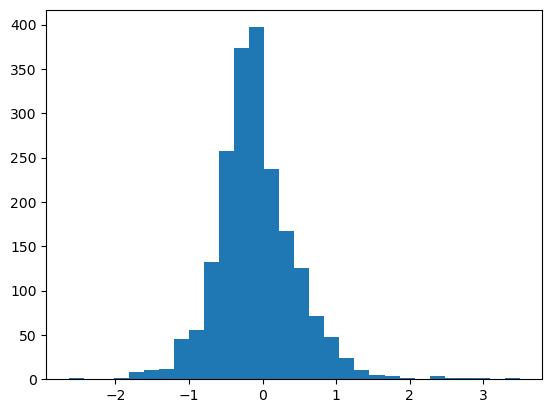

In [184]:
plt.hist(model.coef_[0], bins=30);

In [185]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [190]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 1.5

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 3.4949212095510274
great 2.454240813719143
best 2.0078526645059815
thx 1.8461461868546734
good 1.670922503055941
thanks 2.8399613994187014
love 2.6668807030406425
appreciate 1.8028349416007896
awesome 2.3369084269463
cool 1.8173658756092075
rock 1.5417769831922215
kudos 2.373296245097777
excellent 1.529164758788897
amazing 2.75243031469761
worries 3.0357755752354527
impressed 1.951950674261139
wonderful 2.3192725380936023
type 1.5585043335076432
definitely 1.5305161985173943
professional 1.5038245371398538


In [191]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hours -1.7603164078415094
delayed -1.535618387869215
nothing -1.8231672468849391
system -1.5302149275461594
disappointed -1.6693461573380834
no -1.724781742713548
rude -1.9994998052978903
worst -2.6323700956685494
terrible -1.6082483690454135
hold -1.677325469342058
doesn -1.7986695809380133
unfortunately -1.658112793208057
paid -1.7512920461309596
luggage -1.5927681394504556
website -1.8145454140852666
sucks -1.5923547041905686


In [192]:
# Exercise: print the most-wrong tweets for both classes
# i.e. find a negative review where p(y = 1 | x) is closest to 1
#      find a positive review where p(y = 1 | x) is closest to 0

# Exercise: set class_weight='balanced'
